# Exploratory Data Analysis (EDA)

This notebook generates plots for daily closing price of NIFTY 100 from 2017-01-02 to 2021-01-01 and minute-level closing rice of NIFTY 100 on 2021-01-01 for full market hours and first market hour. 

In [1]:
# import libraries and packages
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
from PIL import Image

## 1. Load data
- The first one hour of market hours (9:15 - 10:15)

In [3]:
raw_data = pd.read_csv('../data/raw data/raw_NIFTY100.csv')
raw_data['time'] = pd.to_datetime(raw_data.timestamp)

In [4]:
raw_data.head()

,timestamp,open,high,low,close,volume,time
0,2017-01-02 09:15:00+05:30,8409.60,8409.75,8390.75,8391.10,0.0,2017-01-02 09:15:00+05:30
1,2017-01-02 09:16:00+05:30,8391.85,8395.35,8390.40,8391.15,0.0,2017-01-02 09:16:00+05:30
2,2017-01-02 09:17:00+05:30,8391.15,8391.55,8373.60,8373.60,0.0,2017-01-02 09:17:00+05:30
3,2017-01-02 09:18:00+05:30,8373.60,8376.75,8369.90,8376.75,0.0,2017-01-02 09:18:00+05:30
4,2017-01-02 09:19:00+05:30,8376.95,8377.25,8372.60,8373.70,0.0,2017-01-02 09:19:00+05:30


In [5]:
raw_data['time']

0        2017-01-02 09:15:00+05:30
1        2017-01-02 09:16:00+05:30
2        2017-01-02 09:17:00+05:30
3        2017-01-02 09:18:00+05:30
4        2017-01-02 09:19:00+05:30
                    ...           
370735   2021-01-01 15:25:00+05:30
370736   2021-01-01 15:26:00+05:30
370737   2021-01-01 15:27:00+05:30
370738   2021-01-01 15:28:00+05:30
370739   2021-01-01 15:29:00+05:30
Name: time, Length: 370740, dtype: datetime64[ns, pytz.FixedOffset(330)]

In [6]:
test_20210101 = raw_data.loc[raw_data.time.apply(lambda x:x.date()==raw_data.time[0].date())].set_index('time')
test_20210101.head()

,timestamp,open,high,low,close,volume
time,,,,,,
2017-01-02 09:15:00+05:30,2017-01-02 09:15:00+05:30,8409.60,8409.75,8390.75,8391.10,0.0
2017-01-02 09:16:00+05:30,2017-01-02 09:16:00+05:30,8391.85,8395.35,8390.40,8391.15,0.0
2017-01-02 09:17:00+05:30,2017-01-02 09:17:00+05:30,8391.15,8391.55,8373.60,8373.60,0.0
2017-01-02 09:18:00+05:30,2017-01-02 09:18:00+05:30,8373.60,8376.75,8369.90,8376.75,0.0
2017-01-02 09:19:00+05:30,2017-01-02 09:19:00+05:30,8376.95,8377.25,8372.60,8373.70,0.0


In [7]:
raw_data.time.min()

Timestamp('2017-01-02 09:15:00+0530', tz='pytz.FixedOffset(330)')

In [8]:
raw_data.time.max()

Timestamp('2021-01-01 15:29:00+0530', tz='pytz.FixedOffset(330)')

In [9]:
raw_data = raw_data.set_index('time')

C:\Users\sohyun\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


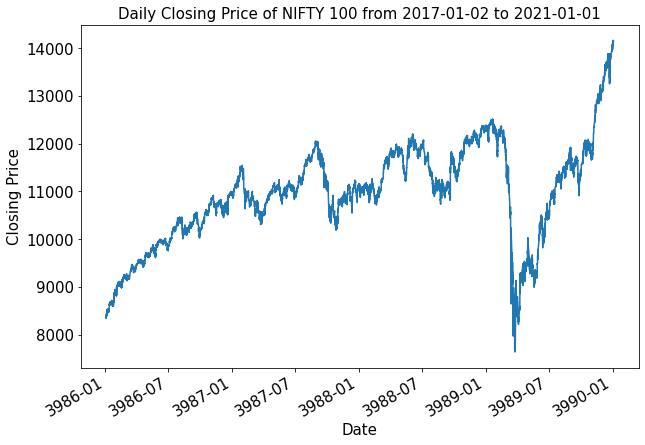

In [10]:
plt.figure(figsize=(10,7))
raw_data.close.plot(fontsize=15)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Closing Price',fontsize=15)
plt.title('Daily Closing Price of NIFTY 100 from 2017-01-02 to 2021-01-01', fontsize = 15)
plt.show()

C:\Users\sohyun\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:256: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


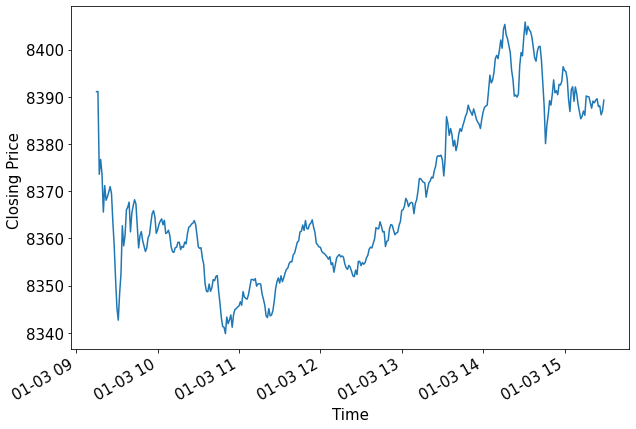

In [11]:
plt.figure(figsize=(10,7))
test_20210101.close.plot(fontsize=15)
plt.xlabel('Time',fontsize=15)
plt.ylabel('Closing Price ',fontsize=15)
plt.show()

### All: Concat 8:30 - end

In [12]:
dm_fp = os.path.join(raw_fp, data_market_name)
data_market = pd.read_csv(dm_fp, parse_dates=['time'])

NameError: name 'raw_fp' is not defined

In [ ]:
data_market.head()

In [ ]:
data_market_vol_20210115 = data_market.loc[data_market.time.apply(lambda x:x.date()==data_market.time[0].date())].set_index('time')
data_market_vol_20210115.head()

In [ ]:
data_all = pd.concat([data_vol_20210115, data_market_vol_20210115])
data_all.head()

In [ ]:
# data_all.to_csv('test_all_vol_20210115.csv')

In [ ]:
data_all.reset_index().time.min()

In [ ]:
data_all.reset_index().time.max()

In [ ]:
plt.figure(figsize=(10,7))
data_all.close.plot(fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Closing Price ',fontsize=18)
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
data_all.Volatility.plot(fontsize=18)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Price Volatility',fontsize=18)
plt.show()

## Image Data

In [ ]:
img_folder = '../data/imgs'

In [ ]:
gdf_ref_fn = 'gramian_date_img_reference.csv'
gdf_ref = pd.read_csv(os.path.join(raw_fp, gdf_ref_fn))

In [ ]:
img_idx_20200115 = gdf_ref[gdf_ref.date=='2020-01-15'].index[0]
img_idx_20200115

In [ ]:
gramian_df = pd.read_csv(os.path.join(raw_fp, '../data/gramian_df.csv'))

In [ ]:
gramian_df.head()

In [ ]:
gdf_df_20200115 = gramian_df.iloc[img_idx_20200115]

In [ ]:
temp = gdf_df_20200115[:-1]

In [ ]:
im = Image.open(img_folder+'/'+'2021-01-15.png')#.shape
im

In [ ]:
im.size

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from pyts.image import GramianAngularField

In [ ]:
scaler = MinMaxScaler(feature_range=(-1,1))
# did not flatten the images
gadf = GramianAngularField(sample_range=(-1,1), method='difference')
curr_row = gramian_df.iloc[img_idx_20200115].dropna().to_frame().T
# Scale the data to be between -1 and 1
curr_feat = scaler.fit_transform(curr_row)
# gramian
curr_X_gadf = gadf.fit_transform(curr_feat)

In [ ]:
pd.DataFrame(curr_X_gadf[:,:,1])

In [ ]:
curr_X_gadf